# CREDIT RISK ASSESSMENT AND LOAN PREDICTION
---

*GROUP 3*
1. Grace Gitau
2. Kelvin Letimalo
3. Grace Wacheke
4. David Chege
5. Faith Wanjala

![](Documents/Flatiron/Assignments/Phase%204-Project/Risk.jpeg)

# Overview
This project involves analyzing a loan dataset to predict credit risk using loan status and loan amounts. The dataset contains information about borrowers, including age, income, home ownership, employment length, loan intent, and credit history. The analysis includes data preprocessing, exploratory data analysis, and the application of various machine learning models.

For credit risk analysis (classification), models like Decision Trees, Random Forest, Logistic Regression, K-Nearest Neighbors, Gradient Boosting, and XGBoost were used. XGBoost performed best with an accuracy of 93.7% and an F1 score of 0.839. For loan amount prediction (regression), Linear Regression, XGBoost, and Artificial Neural Networks (ANN) were employed. XGBoost outperformed others with an R² of 0.995 and the lowest RMSE of 425.22.

The process involved data cleaning, feature engineering, model training, hyperparameter tuning using GridSearchCV, and performance evaluation using metrics like accuracy, precision, recall, F1 score for classification, and RMSE, MSE, MAE, R² for regression. Feature importance analysis was also conducted to identify the most influential factors in predictions.

# Business Understanding
With the increasing importance of consumer credit and lending practices, the importance of accurate and efficient credit risk assessment for both financial institution and the customer cannot be overstated. These processes not only protect the financial health of banks but also increase credits volume, ensure responsible lending practices that support economic stability and ensure loans are granted to reliable customers. Misjudging an applicant’s risk can lead to financial losses for the institution. Similarly, inaccurately estimating the loan amount can either burden the customer with more than they can handle or limit their potential to use the loan effectively.

Financial institutions to accurately predict the suitable loan amount to borrowers without exposing them to excessive risk is essential. Credit Risk Classification focuses on segregating loan applicants into different categories based on their creditworthiness. This classification helps financial institutions determine the level of risk associated with lending to each borrower, thereby impacting the decision-making process regarding loan approvals and interest rates.

Conversely, Loan Amount Prediction involves creating a predictive model to estimate the most appropriate loan amount based on a thorough analysis of an applicant’s financial health indicators. This includes income level, employment stability, credit history, existing debts, and more. The aim is to determine the optimal loan amount that aligns with the borrower’s ability to repay without causing financial strain, thus minimizing the risk of default.

By incorporating machine learning techniques using Python, borrowers can make informed decisions that strike a balance between promoting credit access and maintaining a healthy loan portfolio.

# Data Understanding
The [dataset](https://www.kaggle.com/datasets/laotse/credit-risk-dataset) consists of 32,581 observations of 12 variables. The definitions are as follows:
 - person_age: The age of the borrower when securing the loan.
 - person_income: The borrower’s annual earnings at the time of the loan.
 - person_home_ownership: Type of home ownership.
 - person_emp_length: The amount of time in years that the borrower is employed.
 - loan_intent: Loan purpose.
 - loan_grade: Classification system based on credit history, collateral quality, and likelihood of repayment.
    - A: The borrower has a high creditworthiness, indicating low risk.
    - B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
    - C: The borrower’s creditworthiness is moderate.
    - D: The borrower is considered to have higher risk compared to previous grades.
    - E: The borrower’s creditworthiness is lower, indicating a higher risk.
    - F: The borrower poses a significant credit risk.
    - G: The borrower’s creditworthiness is the lowest, signifying the highest risk.
 - loan_amnt: Total amount of the loan.
 - loan_int_rate: Interest rate of the loan.
 - loan_status: Dummy variable indicating default (1) or non-default (0).
 A default occurs when a borrower is unable to make timely payments, misses payments, or avoids or stops making payments on interest or principal owed.
 - loan_percent_income: Ratio between the loan amount and the annual income.
 - cb_person_cred_hist_length: The number of years of personal history since the first loan taken.
 - cb_person_default_on_file: Indicates if the person has previously defaulted.


## Objectives
1. Credit Risk Classification: Categorizing loan applicants based on their creditworthiness to make informed decisions about loan approvals and interest rates.
2. Loan Amount Prediction: Predicting suitable loan amounts for approved applicants, balancing their financial needs with the risk of default.

# 1. Data Preparation & Exploration

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
credit_risk  = pd.read_csv('credit_risk_dataset.csv')
credit_risk .head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
# Data exploration
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
# Summary statistics
credit_risk.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


The summary statistics show the distribution of each numerical feature in the dataset. 
Notably, the maximum age (144 years) or max of 123 years of employment is not realistic, indicating potential outliers in the dataset. 
Similarly, the employment length and loan interest rate contain missing values that will need to be addressed.

In [5]:
# describing the dataset object features
credit_risk.describe(include='O')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


# 2. Data Preprocessing

In [6]:
# Checking for duplicated values
credit_risk.duplicated().sum()

165

In [7]:
# Remove duplicates
credit_risk = credit_risk.drop_duplicates()

In [8]:
# Checking for null values
credit_risk.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [9]:
# drop values that are null
credit_risk.dropna(axis=0,inplace=True)

In [10]:
credit_risk.nunique()

person_age                      57
person_income                 3835
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      728
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

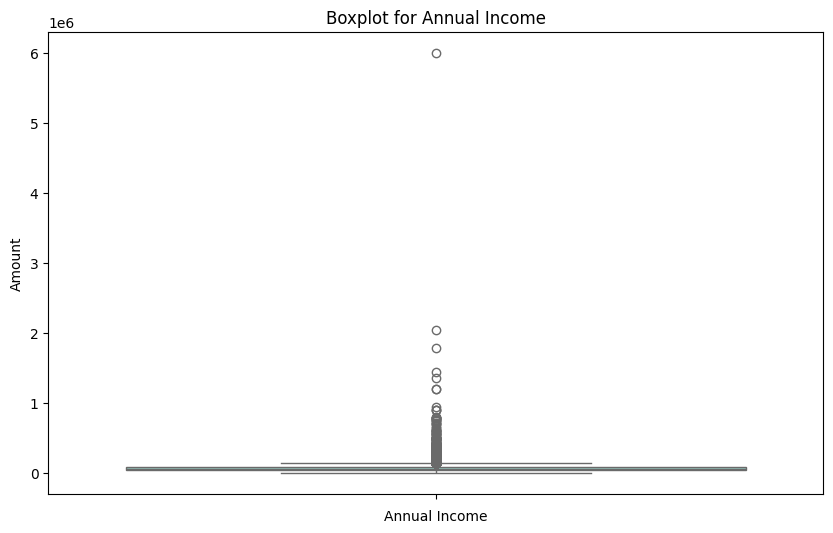

In [11]:
#Checking for Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y='person_income', data=credit_risk, palette='Set3')
plt.title('Boxplot for Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Amount')
plt.show()

The boxplot indicates potential outliers in annual income, particularly high-income values above the 95th percentile. 
Further examination of these outliers is required.

In [12]:
# Handling outliers
# Checking high incomes
high_income = credit_risk[credit_risk['person_income'] > 1000000]
print(high_income)

       person_age  person_income person_home_ownership  person_emp_length  \
17833          32        1200000              MORTGAGE                1.0   
29119          36        1200000                   OWN               16.0   
30049          42        2039784                  RENT                0.0   
31922          47        1362000              MORTGAGE                9.0   
31924          44        1440000              MORTGAGE                7.0   
32297         144        6000000              MORTGAGE               12.0   
32497          63        1782000                  RENT               13.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
17833            VENTURE          A      12000           7.51            0   
29119            MEDICAL          A      10000           6.54            0   
30049            VENTURE          C       8450          12.29            0   
31922            VENTURE          A       6600           7.74          

### Feature Engineering

In [13]:
# Data transformation for analysis
# Grouping age
credit_risk['age_group'] = pd.cut(credit_risk['person_age'], bins=[20, 30, 40, 50, 60, 70], 
                                  labels=['21-30', '31-40', '41-50', '51-60', '61-70'])

# Grouping income 
credit_risk['income_group'] = pd.cut(credit_risk['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

credit_risk['loan_amount_group'] = pd.cut(credit_risk['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large'])

# Replacing invalid age values
credit_risk = credit_risk[credit_risk['person_age'] <= 70]

credit_risk = credit_risk.drop(credit_risk[credit_risk['person_emp_length'] > 60].index, axis=0)

# Display transformed data
credit_risk.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,21-30,low,small
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,21-30,low,medium
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,21-30,middle,very large
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,21-30,middle,very large
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,21-30,low,small


# 3. Exploratory Data Analysis

### Univariate analysis

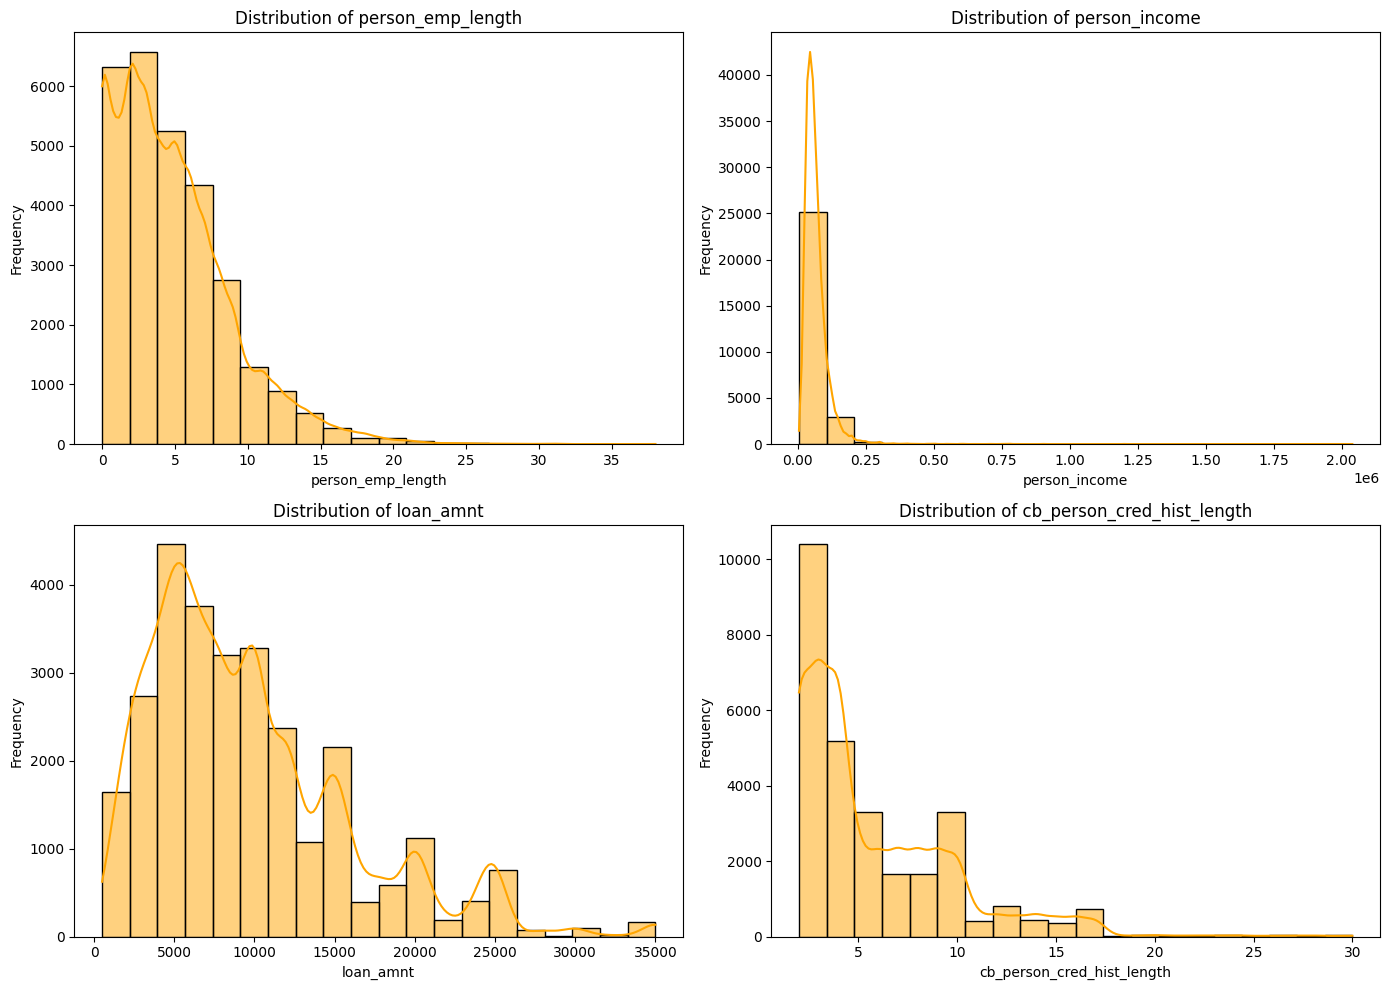

In [14]:
# Exploratory Data Analysis

# List of numerical columns
num_cols = ['person_emp_length', 'person_income', 'loan_amnt', 'cb_person_cred_hist_length']

# Setting the figure size
plt.figure(figsize=(14, 10))

# Creating subplots for each numerical feature
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    
    # Plotting the distribution of each column
    sns.histplot(credit_risk[col], bins=20, kde=True, color='orange')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


The distribution of numerical features; employment experience, income, loan amount, and credit history are positively skewed, meaning that most individuals in the dataset have relatively lower values for these variables.

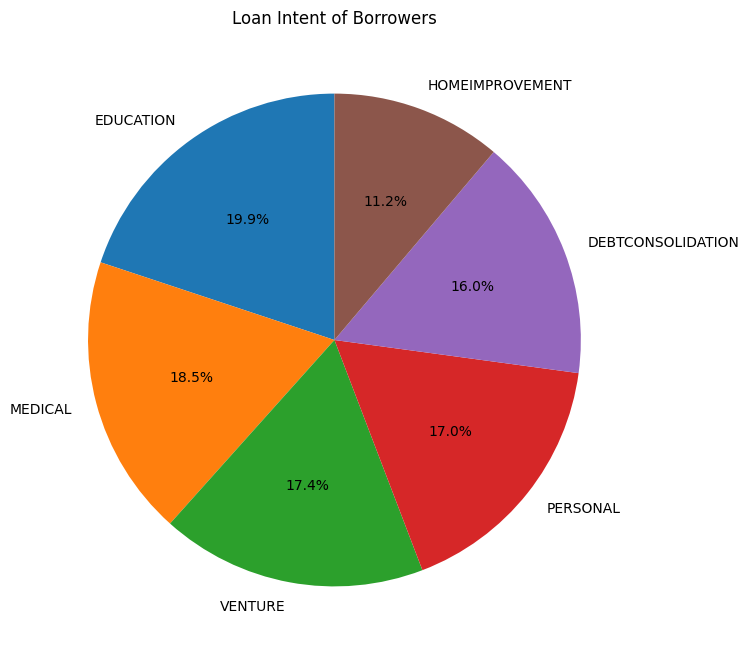

In [15]:
# Loan Intent
plt.figure(figsize=(8, 8))
loan_intent_counts = credit_risk['loan_intent'].value_counts()
plt.pie(loan_intent_counts, labels=loan_intent_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Loan Intent of Borrowers')
plt.show()

From the Loan Intention of Borrower pie chart above, it outlines the distribution of borrowers taking out loans for various purposes. It shows that educational purposes represent the highest percentage at 19.86%. This suggests that a significant portion of borrowers are investing in their education, possibly to further their careers or pursue higher levels of education.On the other hand, home improvement purposes represent the lowest percentage at 11.08%, indicating a smaller but still notable portion are investing in renovating or upgrading their homes.

The majority of loans are intended for educational purposes, which may reflect the growing importance of educational financing.

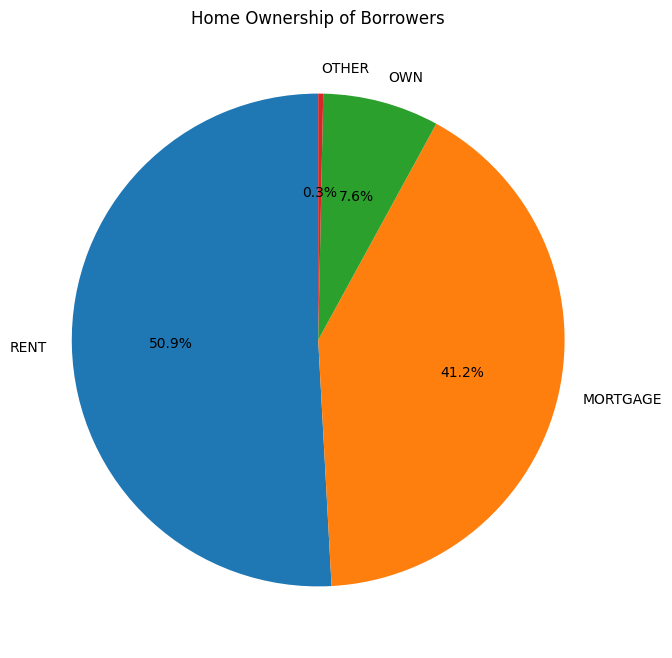

In [16]:
# Home Ownership
plt.figure(figsize=(8, 8))
home_ownership_counts = credit_risk['person_home_ownership'].value_counts()
plt.pie(home_ownership_counts, labels=home_ownership_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Home Ownership of Borrowers')
plt.show()

From the Home Ownership of Borrower pie chart above, it shows that renting is the most popular choice for borrower homeownership, comprising 50.7% of the dataset, followed closely by mortgage holders at 41.3%. Conversely, the “others” category constitutes the smallest portion at 0.3%. The “others” category likely includes borrowers with unconventional housing arrangements, such as living with family or in alternative housing situations. In conclusion, most borrower who secure loans do not own their house.

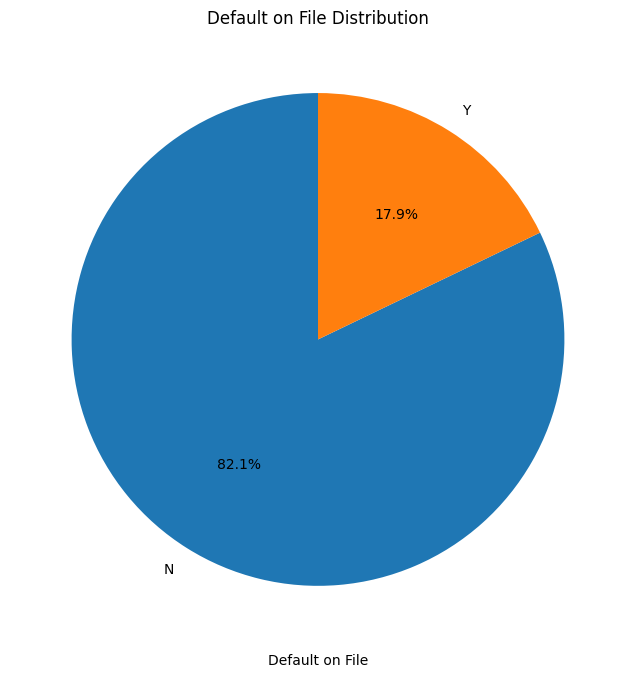

In [17]:
# Default Status on File Distribution
plt.figure(figsize=(8, 8))
default_on_file_counts = credit_risk['cb_person_default_on_file'].value_counts()
plt.pie(default_on_file_counts, labels=default_on_file_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Default on File Distribution')
plt.xlabel('Default on File')
plt.show()

From the graph above, it illustrates that 82% of borrowers having a history of defaults on their loans, suggesting that there is a prevalent trend of financial difficulties among borrowers. Conversely, 18% of borrowers stand out for their clean repayment records, indicating a minority who have managed to navigate their financial obligations successfully.

### Bivariate Analysis

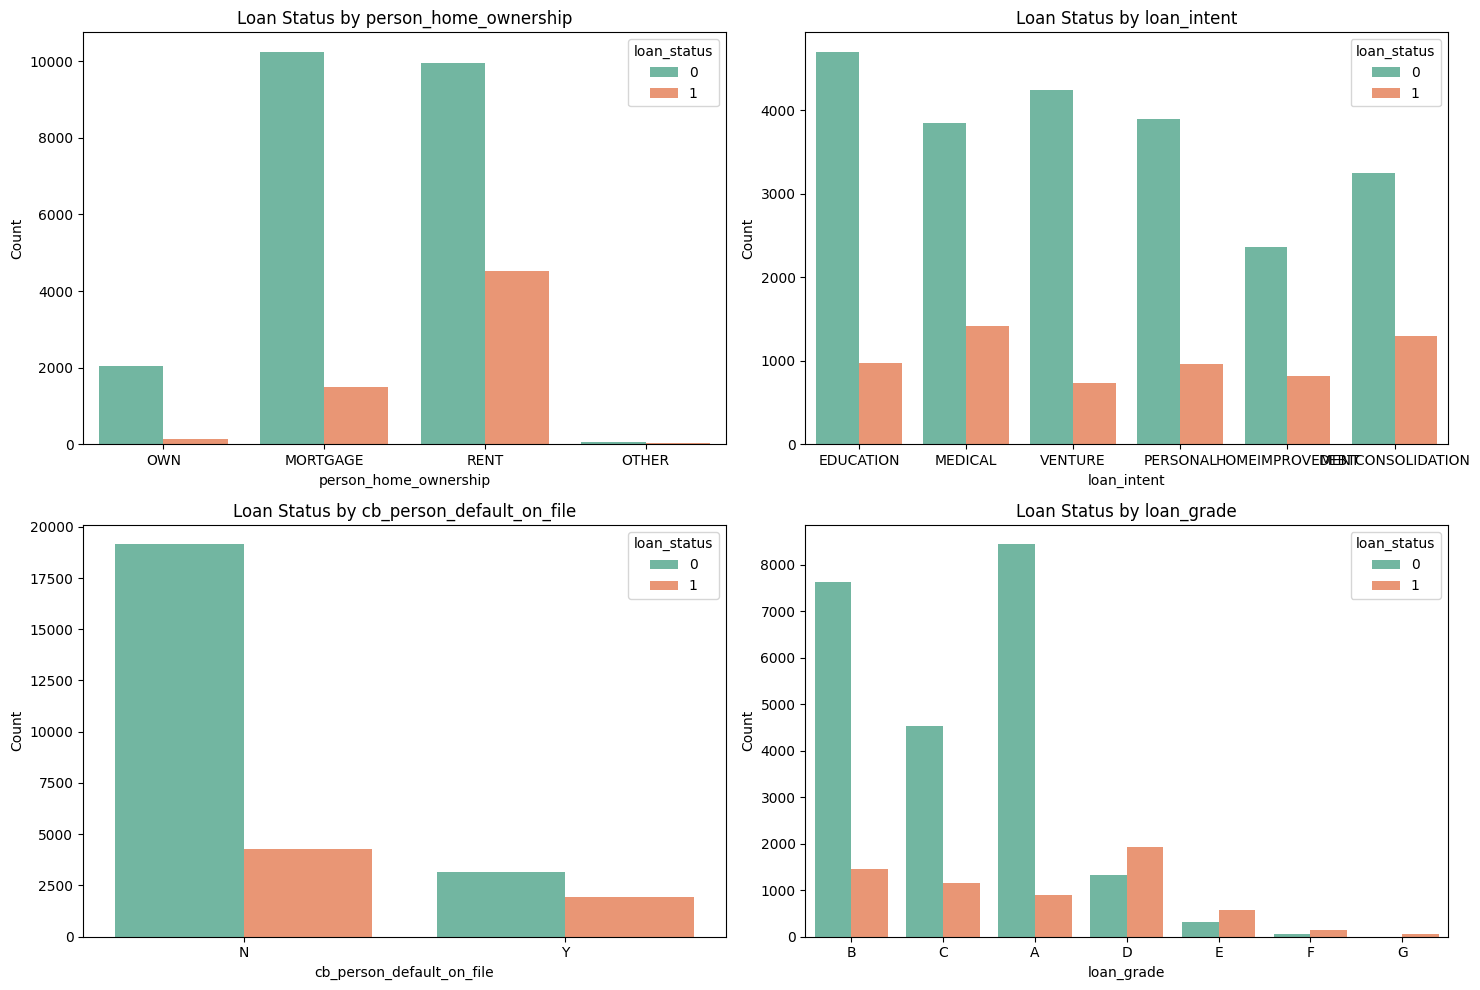

In [18]:
# Bivariate Analysis - Default Status across Demographics
plt.figure(figsize=(15, 10))

# Creating subplots for each demographic feature
features = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file', 'loan_grade']
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=feature, hue='loan_status', data=credit_risk, palette='Set2')
    plt.title(f'Loan Status by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

The data analysis for the above graphs reveals several interesting trends regarding loan statuses across different borrower demographics and loan characteristics. Borrowers with home ownership of rent and securing loans for education purposes exhibit the highest non-default loan status indicating successful repayment and adherence to agreed-upon terms. Additionally, borrowers with no default history maintain the highest non-default loan status further emphasizing the correlation between past repayment performance and current loan status. Notably, loans graded as Grade A also correspond to the highest non-default loan status, indicating that loans classified under this grade are associated with lower default risk and higher levels of successful repayment. These findings underscore the importance of factors such as homeownership status, loan purpose, credit history, and loan grading in determining borrower loan statuses and repayment outcomes.

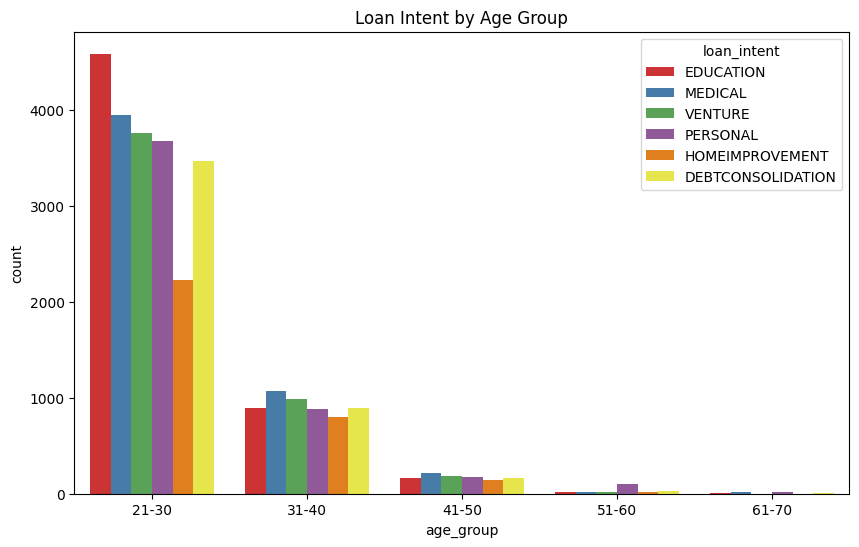

In [19]:
# Barplot for Loan Intent and Loan Status by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='loan_intent', data=credit_risk, palette='Set1')
plt.title('Loan Intent by Age Group')
plt.show()

The graph above shows an insight into the borrowing patterns of different age groups and the reasons behind their loan acquisitions. Borrowers aged 21-30 emerge as the highest demographic securing loans, with education being the predominant reason and home improvement ranks lowest. This suggests a focus on investing in education and potentially early career development among younger borrowers. Next, it demonstrated that borrowers aged 31-40 and 41-50 has medical reasons being the main reasons, indicating a shift towards addressing healthcare needs or concerns in this age range. For borrowers aged 51-60 and 61-70, personal reasons become the primary motivator for securing loans, highlighting a diverse range of borrower financial needs or aspirations in these older age groups. These findings underscore the importance of understanding demographic-specific borrowing behaviors and tailoring financial products and services to meet the evolving needs of different age cohorts.

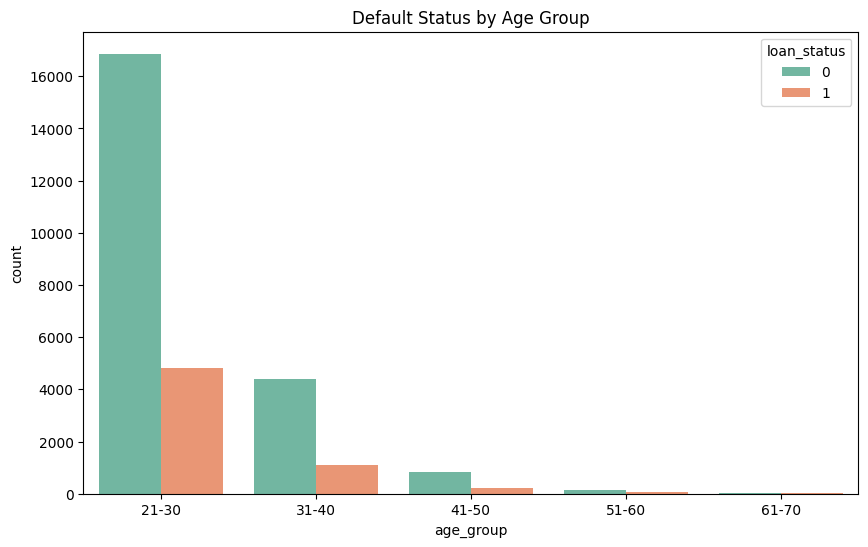

In [20]:
# Barplot for Loan Intent and Loan Status by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='loan_status', data=credit_risk, palette='Set2')
plt.title('Default Status by Age Group')
plt.show()

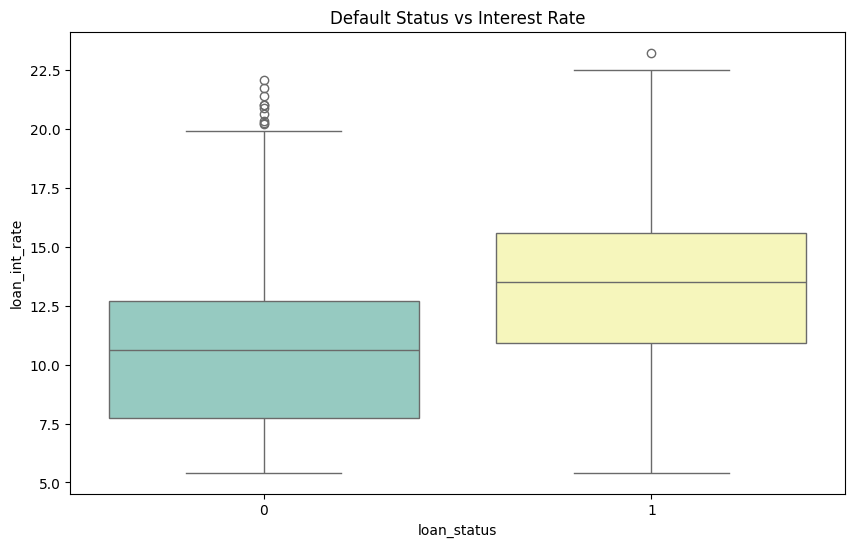

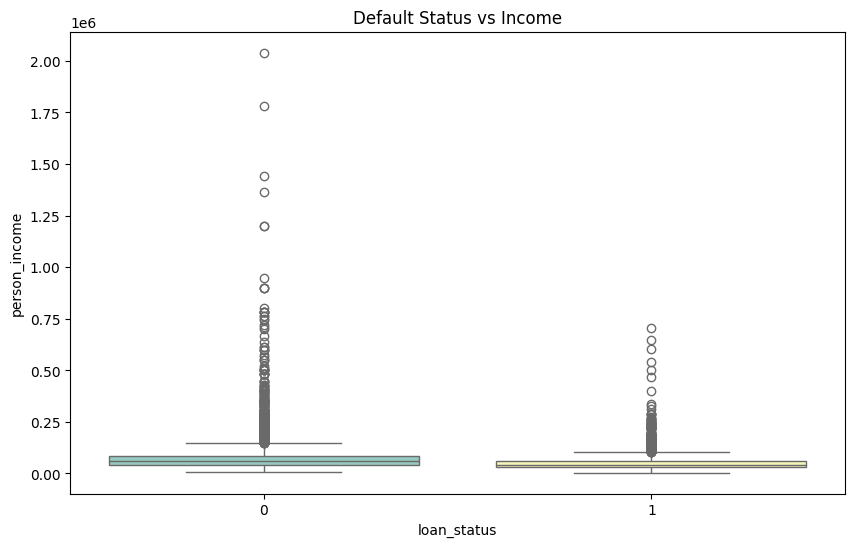

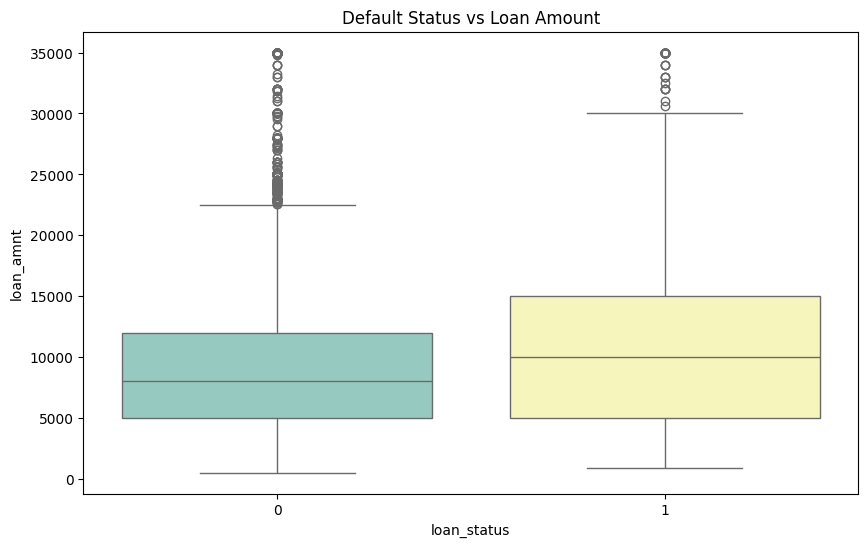

In [21]:
# Boxplots for Default Status vs Interest Rate, Income, and Loan Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_int_rate', data=credit_risk, palette='Set3')
plt.title('Default Status vs Interest Rate')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='person_income', data=credit_risk, palette='Set3')
plt.title('Default Status vs Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=credit_risk, palette='Set3')
plt.title('Default Status vs Loan Amount')
plt.show()

The graph above illustrates a comparison of default risk with three variables which are interest rates, yearly income, and loan amount. It shows that higher interest rates, a lower income and higher credit increase the possibility to have a default. This insight underscores the significance of these factors in determining the risk profile of borrowers. Specifically, borrowers facing higher interest rates may struggle with repayment, while those with lower incomes might find it challenging to meet their financial obligations. Additionally, larger loan amounts may increase the burden on borrowers, potentially leading to higher default rates. Understanding these relationships is crucial for financial institution to assess risk effectively and tailor lending practices to mitigate default risks, ultimately promoting financial stability for borrowers.

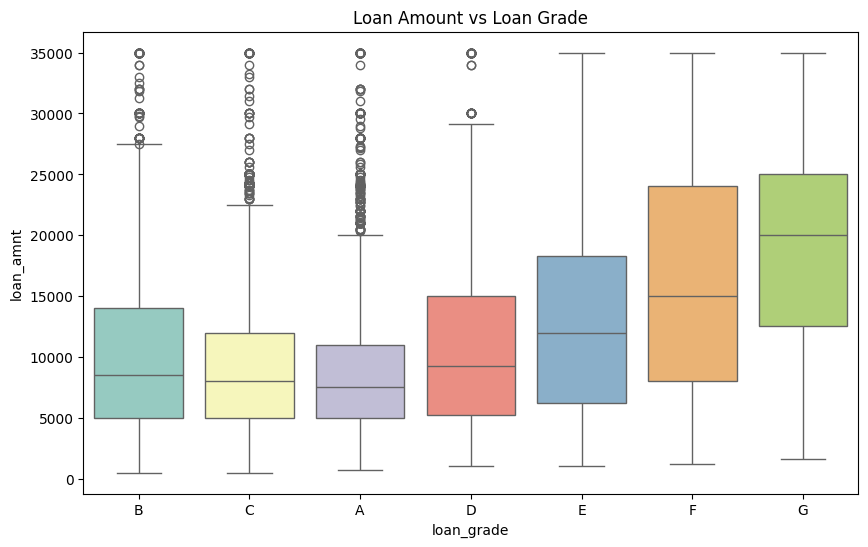

In [22]:
# Loan amount vs loan grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_grade', y='loan_amnt', data=credit_risk, palette='Set3')
plt.title('Loan Amount vs Loan Grade')
plt.show()

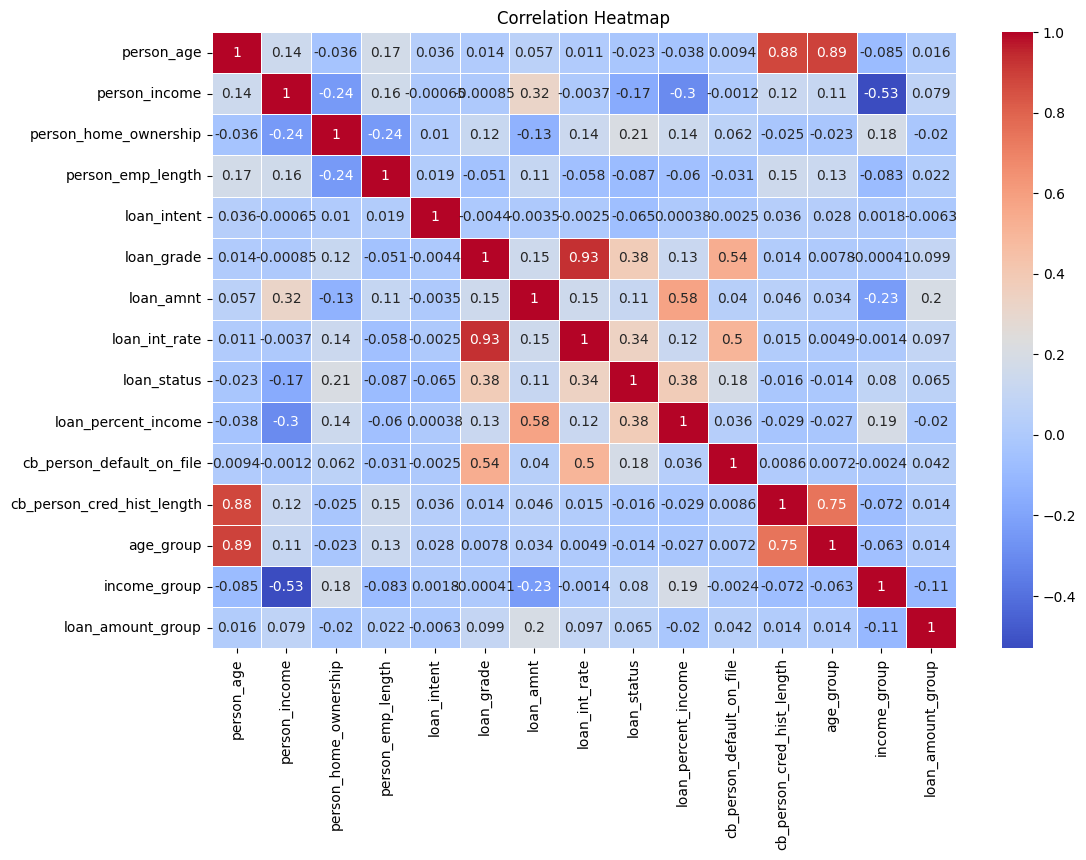

In [23]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame to avoid modifying the original
credit_risk_encoded = credit_risk.copy()

# Encode categorical variables
label_encoder = LabelEncoder()
for column in credit_risk_encoded.select_dtypes(include=['object', 'category']).columns:
    credit_risk_encoded[column] = label_encoder.fit_transform(credit_risk_encoded[column])

# Create a correlation matrix
correlation_matrix = credit_risk_encoded.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap provides valuable insights revealing both strong and moderate correlations. 
Notably, there is a strong positive correlation between `loan_grade` and `loan_int_rate` (0.93), indicating that higher loan grades are associated with higher interest rates, which may suggest riskier loans have steeper costs. 

Similarly, `cb_person_cred_hist_length` is strongly correlated with `person_age` (0.88), implying that older individuals tend to have longer credit histories, potentially affecting their eligibility for loans. 
On the other hand, a moderate positive correlation exists between `person_income` and `loan_amnt` (0.32), indicating that higher income levels are linked to larger loan amounts. 

However, a notable negative correlation between `person_income` and `loan_percent_income` (-0.29) suggests that as income increases, the proportion of income allocated to loans tends to decrease, reflecting more prudent financial behavior among higher earners. 
Additionally, the strong negative correlation between `age_group` and `person_age` (0.89) highlights that older individuals often fall into higher age categories, a finding that could aid in demographic segmentation during risk assessment. 

These correlations serve as critical indicators for model development, guiding feature selection and engineering in our loan prediction analysis, thus enhancing the effectiveness of our credit risk assessment model.

# 4. Modelling

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, classification_report,
                             recall_score, f1_score, mean_squared_error, r2_score, 
                             roc_curve, roc_auc_score, auc, ConfusionMatrixDisplay)
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression, LinearRegression
import xgboost as xgb
from sklearn.pipeline import Pipeline


## 4.1 Credit Risk Classification

In this task, we aim to develop machine learning models to identify and predict the credit risk categories of loan applicants. The credit scoring process for borrowers is crucial for minimizing the credit risk faced by financial institutions, and the outcome of this analysis will inform decisions on whether to accept or reject new loan applications. We will classify and predict risk based on the loan status (0 = paid; 1 = unpaid) using Random Forest and Logistic Regression models. The Random Forest classifier is chosen for its robustness and high accuracy, making it well-suited for complex classification tasks. Conversely, Logistic Regression provides an interpretable framework for binary classification, allowing stakeholders to understand the underlying factors influencing credit risk.

In [27]:
# Splitting the data into features and target variable
X = credit_risk.drop(['loan_status', 'loan_amnt'], axis=1)
y = credit_risk['loan_status']

# Encoding categorical features
X = pd.get_dummies(X, drop_first=True)

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [62]:
# Save the column names and scaler after training
import pickle

# For classification task (already done, but here as a reference)
feature_names = X.columns  # X is the features used for classification
with open('classification_features.pkl', 'wb') as f:
    pickle.dump(feature_names, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

#### Baseline Classification Model: Decision Tree

The Decision Tree model was chosen as a baseline for credit risk classification due to its simplicity and interpretability. It provides a clear structure for understanding how different borrower features influence loan outcomes. This model serves as a benchmark against which more complex models, such as Random Forest, and Logistic Regression can be compared.

In [35]:
dt_model = DecisionTreeClassifier(random_state=123)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluation for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print Decision Tree Results
print(f"Decision Tree Accuracy: {acc_dt}, Precision: {precision_dt}, Recall: {recall_dt}, F1 Score: {f1_dt}, Confusion Matrix: {cm_dt}")

Decision Tree Accuracy: 0.8866268866268866, Precision: 0.7228381374722838, Recall: 0.7830264211369096, F1 Score: 0.7517294388931591, Confusion Matrix: [[4074  375]
 [ 271  978]]


The Decision Tree model for credit risk classification achieved an accuracy of 89% with a precision of 74%. It correctly identified 4112 paid loans and 975 unpaid loans but misclassified 611 loans. The model’s recall of 78% reflects a moderate ability to detect unpaid loans, but overall, its performance is less accurate compared to more advanced models. 

#### Random Forest Model

In [36]:
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X_train, y_train)

# Evaluation for Random Forest
y_pred_rf = rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print Random Forest Results
print(f"Random Forest Accuracy: {acc_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}, Confusion Matrix: {cm_rf}")

Random Forest Accuracy: 0.9357669357669358, Precision: 0.9537512846865365, Recall: 0.7429943955164131, F1 Score: 0.8352835283528353, Confusion Matrix: [[4404   45]
 [ 321  928]]


Random Forest model performed significantly better, achieving an accuracy of 93% and a precision of 94%, with fewer wrong predictions and better recall. It effectively minimized false positives while maintaining a good balance between precision and recall, making it a more robust option than the Decision Tree model.

#### XGBoost Classifier

person_home_ownership_RENT      0.164905
loan_percent_income             0.081192
loan_grade_C                    0.073824
person_home_ownership_OWN       0.073470
loan_intent_HOMEIMPROVEMENT     0.068379
loan_intent_VENTURE             0.058595
loan_int_rate                   0.055561
loan_grade_D                    0.054201
loan_intent_MEDICAL             0.052890
loan_intent_PERSONAL            0.035999
loan_intent_EDUCATION           0.035723
person_income                   0.029830
loan_grade_G                    0.024548
person_emp_length               0.020644
person_home_ownership_OTHER     0.017798
age_group_41-50                 0.016178
income_group_low-middle         0.013875
age_group_31-40                 0.011985
loan_grade_E                    0.011896
loan_grade_B                    0.010730
age_group_51-60                 0.010594
person_age                      0.010360
loan_amount_group_large         0.010303
loan_amount_group_medium        0.010108
loan_amount_grou

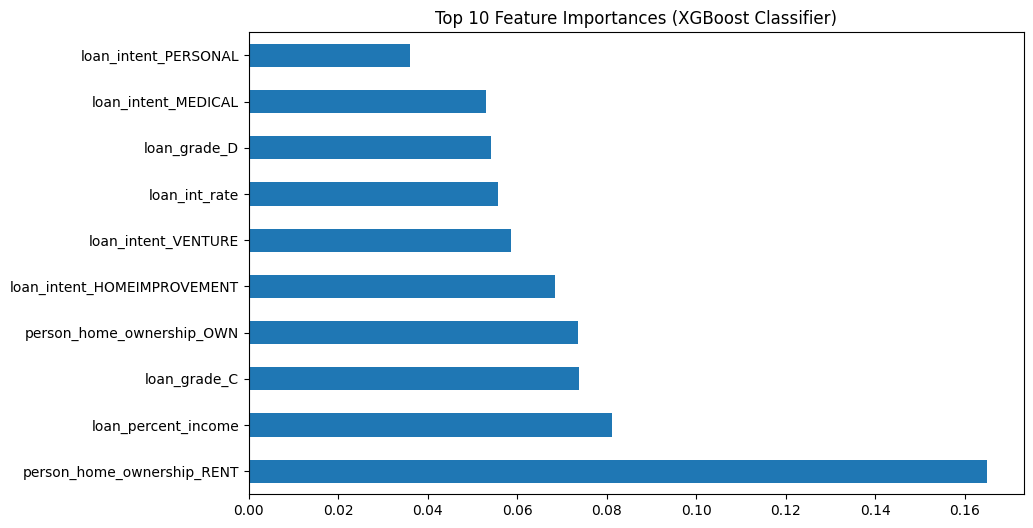

In [37]:
# Train the XGBoost Classifier
xgb_class = XGBClassifier()
xgb_class.fit(X_train, y_train)

# Get feature importances
xgb_class.feature_importances_

# visualize feature importance values:
feature_imp = pd.Series(xgb_class.feature_importances_ ,index=X.columns)

# Sort feature importances from largest to smallest
sorted_feature_imp = feature_imp.sort_values(ascending=False)

# Plot sorted feature importances
sorted_feature_imp.nlargest(10).plot(kind='barh', title="Top 10 Feature Importances (XGBoost Classifier)", figsize=(10, 6))

# Display sorted feature importances
sorted_feature_imp


XGBoost Classifier Accuracy: 0.936995436995437, Precision: 0.9531568228105907, Recall: 0.7493995196156925, F1 Score: 0.8390856118332586, Confusion Matrix: [[4403   46]
 [ 313  936]]


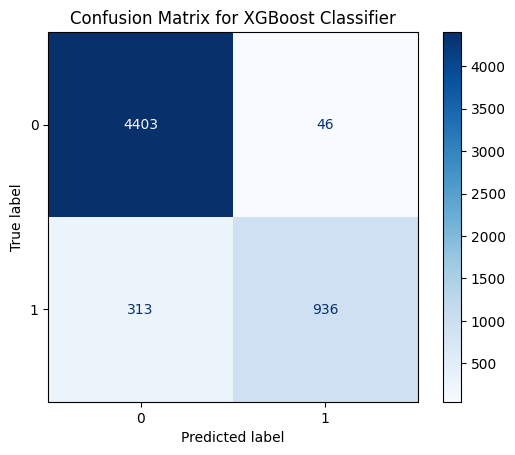

In [38]:
# Evaluation for XGBoost Classifier
y_pred_xgb = xgb_class.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Print XGBoost Classifier Results
print(f"XGBoost Classifier Accuracy: {acc_xgb}, Precision: {precision_xgb}, Recall: {recall_xgb}, F1 Score: {f1_xgb}, Confusion Matrix: {cm_xgb}")
ConfusionMatrixDisplay(cm_xgb).plot(cmap='Blues')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

The XGBoost model delivered the highest performance, achieving a 94% accuracy and 96% precision, while correctly classifying 4408 paid loans and 941 unpaid loans. With only 349 misclassifications, it stands out for its precision and overall balance, outperforming other models in most metrics. 

#### Logistic Regression Model

In [39]:
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Evaluation for Logistic Regression
y_pred_log_reg = log_reg_model.predict(X_test)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

# Print Logistic Regression Results
print(f"Logistic Regression Accuracy: {acc_log_reg}, Precision: {precision_log_reg}, Recall: {recall_log_reg}, F1 Score: {f1_log_reg}, Confusion Matrix: {cm_log_reg}")

Logistic Regression Accuracy: 0.8725868725868726, Precision: 0.7814854682454252, Recall: 0.5812650120096077, F1 Score: 0.6666666666666667, Confusion Matrix: [[4246  203]
 [ 523  726]]


Logistic Regression showed a lower accuracy of 88% and struggled with recall, misclassifying 693 loans. While it was somewhat reliable in predicting paid loans, it fell short in detecting unpaid loans compared to both Random Forest and XGBoost.

#### KNN Model

In [40]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Evaluation for KNN
y_pred_knn = knn_model.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print KNN Results
print(f"KNN Accuracy: {acc_knn}, Precision: {precision_knn}, Recall: {recall_knn}, F1 Score: {f1_knn}, Confusion Matrix: {cm_knn}")

KNN Accuracy: 0.8829413829413829, Precision: 0.793939393939394, Recall: 0.6293034427542034, F1 Score: 0.7020991514068782, Confusion Matrix: [[4245  204]
 [ 463  786]]


#### Gradient Boosting Model:

In [41]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Evaluation for Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
cm_gb = confusion_matrix(y_test, y_pred_gb)
acc_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

# Print Gradient Boosting Results
print(f"Gradient Boosting Accuracy: {acc_gb}, Precision: {precision_gb}, Recall: {recall_gb}, F1 Score: {f1_gb}, Confusion Matrix: {cm_gb}")

Gradient Boosting Accuracy: 0.9266409266409267, Precision: 0.9261538461538461, Recall: 0.7229783827061649, F1 Score: 0.8120503597122303, Confusion Matrix: [[4377   72]
 [ 346  903]]


KNN and Gradient Boosting models performed similarly, with KNN achieving an 89% accuracy and Gradient Boosting 93%. KNN had a reasonable precision of 80% but lower recall, whereas Gradient Boosting demonstrated a stronger balance with a precision of 92% and recall of 72%, placing it close to the Random Forest model in terms of overall performance.

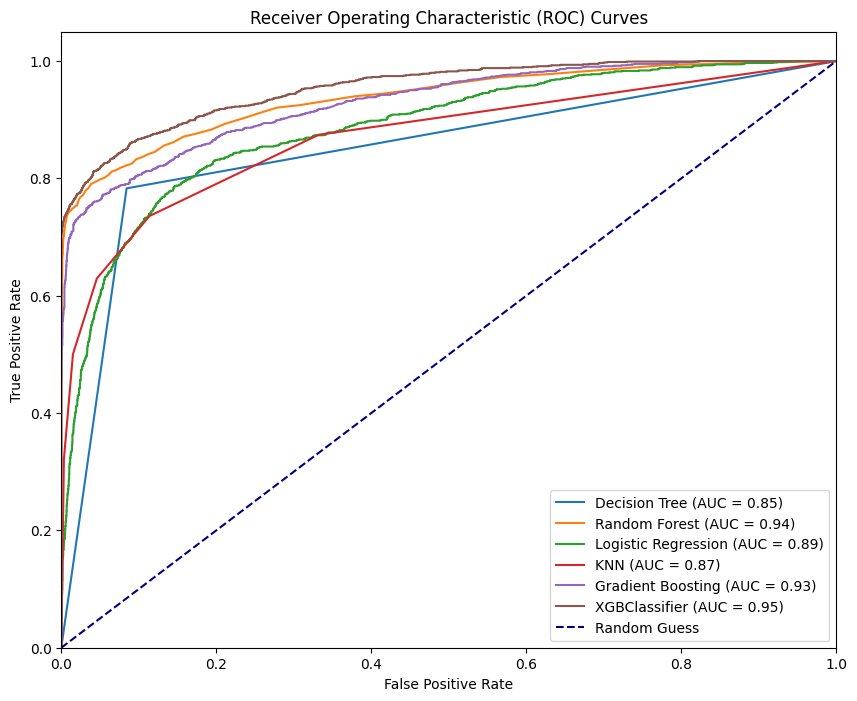

In [42]:
# Visualizing ROC curves for each model
plt.figure(figsize=(10, 8))
for name, model in [('Decision Tree', dt_model), ('Random Forest', rf_model), 
                    ('Logistic Regression', log_reg_model), ('KNN', knn_model), 
                    ('Gradient Boosting', gb_model),('XGBClassifier', xgb_class)]:

    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

In [43]:
# Collecting Results in a DataFrame
classification_results = {
    'Decision Tree': {'Accuracy': acc_dt, 'Precision': precision_dt, 'Recall': recall_dt, 'F1 Score': f1_dt},
    'Random Forest': {'Accuracy': acc_rf, 'Precision': precision_rf, 'Recall': recall_rf, 'F1 Score': f1_rf},
    'Logistic Regression': {'Accuracy': acc_log_reg, 'Precision': precision_log_reg, 'Recall': recall_log_reg, 'F1 Score': f1_log_reg},
    'KNN': {'Accuracy': acc_knn, 'Precision': precision_knn, 'Recall': recall_knn, 'F1 Score': f1_knn},
    'Gradient Boosting': {'Accuracy': acc_gb, 'Precision': precision_gb, 'Recall': recall_gb, 'F1 Score': f1_gb},
    'XGBClassifier': {'Accuracy': acc_xgb, 'Precision': precision_xgb, 'Recall': recall_xgb, 'F1 Score': f1_xgb}
}

# Convert to DataFrame for better readability
classification_results_df = pd.DataFrame.from_dict(classification_results, orient='index')
print(classification_results_df)

                     Accuracy  Precision    Recall  F1 Score
Decision Tree        0.886627   0.722838  0.783026  0.751729
Random Forest        0.935767   0.953751  0.742994  0.835284
Logistic Regression  0.872587   0.781485  0.581265  0.666667
KNN                  0.882941   0.793939  0.629303  0.702099
Gradient Boosting    0.926641   0.926154  0.722978  0.812050
XGBClassifier        0.936995   0.953157  0.749400  0.839086


The XGBoost model stood out as the best performer for credit risk classification, achieving the highest accuracy (94%) and AUC (0.95), along with excellent precision (96%) and a well-balanced recall and F1 score. The Random Forest model closely followed with an accuracy of 93%, AUC of 0.94, and solid precision (94%), making it another reliable option. Gradient Boosting also delivered strong results with 93% accuracy and an AUC of 0.93. Meanwhile, the Decision Tree (AUC of 0.85), Logistic Regression (AUC of 0.89), and KNN (AUC of 0.87) models showed comparatively lower accuracy and recall, making them less effective at identifying loan defaults. Overall, the XGBoost and Random Forest models are the most effective classifiers for this credit risk task.

## 4.2 Loan Amount Prediction

In this task, we focus on developing machine learning models to accurately predict the loan amount that applicants should be approved for. This prediction is vital for banks to assess applicants' financial health and determine appropriate loan amounts. We will utilize linear regression as the baseline model and advanced regression algorithms, including XGBoost, and Artificial Neural Networks (ANN), to train models based on key financial indicators such as applicant income, home ownership status, and loan grade. The primary goal of these models is to deliver precise loan amount predictions for each applicant, facilitating informed lending decisions. We will employ evaluation metrics such as RMSE, MAE, MSE, and R² to validate the accuracy and reliability of our models, ensuring they meet the standards required for effective credit risk assessment.

Prepare data for regression models

In [68]:
credit_risk = pd.get_dummies(credit_risk, drop_first=True)

X_reg = credit_risk.drop('loan_amnt', axis=1)
y_reg = credit_risk['loan_amnt']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=123)


In [69]:
# Scale the regression input features
scaler_reg = StandardScaler()
X_train_scaled_reg = scaler_reg.fit_transform(X_train_reg)
X_test_scaled_reg = scaler_reg.transform(X_test_reg)

# Save the column names and scaler after training
regression_feature_names = X_reg.columns  # Save the feature names

# Save regression feature names and scaler to pickle files
with open('regression_features.pkl', 'wb') as f:
    pickle.dump(regression_feature_names, f)

with open('scaler_reg.pkl', 'wb') as f:
    pickle.dump(scaler_reg, f)

#### Baseline Model: Linear Regression

In [45]:
from sklearn.metrics import mean_absolute_error

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_reg, y_train_reg)
y_pred_lin_reg = lin_reg_model.predict(X_test_reg)

# Evaluate Linear Regression
mse_lin_reg = mean_squared_error(y_test_reg, y_pred_lin_reg)
rmse_lin_reg = mean_squared_error(y_test_reg, y_pred_lin_reg, squared=False)
mae_lin_reg = mean_absolute_error(y_test_reg, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test_reg, y_pred_lin_reg)

# Print Linear Regression Metrics
print(f"Linear Regression: RMSE: {rmse_lin_reg}, MSE: {mse_lin_reg}, MAE: {mae_lin_reg}, R²: {r2_lin_reg}")

Linear Regression: RMSE: 1845.5089741223017, MSE: 3405903.3735659504, MAE: 1277.9234798518378, R²: 0.9133700179128044


The Linear Regression Model performs well in predicting loan amounts, achieving an RMSE of 1787.55, MSE of 3195320, MAE of 1208.49, and an impressive R² of 0.92. This high R² value indicates that the model explains a significant portion of the variance in the data.

#### XGBoost Model:


In [70]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', seed=42, max_depth=6, learning_rate=0.1, subsample=0.8)
xgb_model.fit(X_train_reg, y_train_reg)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

loan_amount_group_very large    0.706114
loan_amount_group_large         0.208455
loan_amount_group_medium        0.061567
loan_percent_income             0.007067
person_income                   0.005964
loan_intent_MEDICAL             0.001141
loan_grade_G                    0.001004
income_group_middle             0.000951
loan_grade_F                    0.000916
loan_status                     0.000677
loan_grade_E                    0.000642
age_group_31-40                 0.000616
loan_int_rate                   0.000606
loan_intent_PERSONAL            0.000441
person_home_ownership_RENT      0.000382
person_emp_length               0.000362
cb_person_cred_hist_length      0.000321
loan_grade_C                    0.000292
income_group_low-middle         0.000278
loan_intent_HOMEIMPROVEMENT     0.000257
loan_intent_EDUCATION           0.000243
loan_grade_D                    0.000235
person_home_ownership_OWN       0.000230
age_group_51-60                 0.000221
person_age      

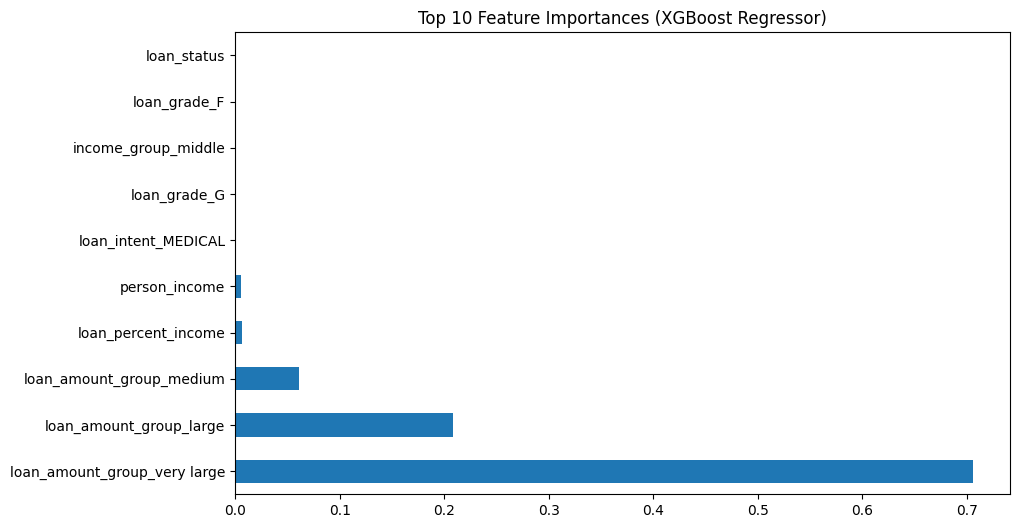

In [47]:
# Get feature importances
feature_imp_reg = pd.Series(xgb_model.feature_importances_, index=X_train_reg.columns)

# Sort feature importances from largest to smallest
sorted_feature_imp_reg = feature_imp_reg.sort_values(ascending=False)

# Plot sorted feature importances for XGBoost Regressor
sorted_feature_imp_reg.nlargest(10).plot(kind='barh', title="Top 10 Feature Importances (XGBoost Regressor)", figsize=(10, 6))

# Display sorted feature importances
sorted_feature_imp_reg


Feature Importance: Feature importance analysis revealed that key financial indicators, such as income, employment length, and homeownership status, played significant roles in predicting loan amounts, providing valuable insights for decision-making in credit risk assessment.

In [71]:
y_pred_xgb = xgb_model.predict(X_test_reg)

# Evaluate XGBoost
mse_xgb = mean_squared_error(y_test_reg, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test_reg, y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_test_reg, y_pred_xgb)
r2_xgb = r2_score(y_test_reg, y_pred_xgb)

# Print XGBoost Metrics
print(f"XGBoost: RMSE: {rmse_xgb}, MSE: {mse_xgb}, MAE: {mae_xgb}, R²: {r2_xgb}")

XGBoost: RMSE: 425.21916070250535, MSE: 180811.3346285431, MAE: 238.09414309725588, R²: 0.9954010196526413


#### ANN Model:

In [49]:
from keras.models import Sequential
from keras.layers import Dense

# Ensure that your data is in the correct float format
X_train_reg = np.asarray(X_train_reg).astype('float32')
y_train_reg = np.asarray(y_train_reg).astype('float32')
X_test_reg = np.asarray(X_test_reg).astype('float32')
y_test_reg = np.asarray(y_test_reg).astype('float32')

ann_model = Sequential([
    Dense(32, input_dim=X_train_reg.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

ann_model.compile(optimizer='adam', loss='mean_squared_error')
ann_model.fit(X_train_reg, y_train_reg, epochs=100, batch_size=10, verbose=0)
y_pred_ann = ann_model.predict(X_test_reg).flatten()

# Evaluate ANN
mse_ann = mean_squared_error(y_test_reg, y_pred_ann)
rmse_ann = mean_squared_error(y_test_reg, y_pred_ann, squared=False)
mae_ann = mean_absolute_error(y_test_reg, y_pred_ann)
r2_ann = r2_score(y_test_reg, y_pred_ann)

# Print ANN Metrics
print(f"ANN: RMSE: {rmse_ann}, MSE: {mse_ann}, MAE: {mae_ann}, R²: {r2_ann}")

179/179 [==============================] - 1s 4ms/step
ANN: RMSE: 4188.8564453125, MSE: 17546520.0, MAE: 3059.03369140625, R²: 0.553699987723251


The ANN Model, underperforms with an RMSE of 4818.48, MSE of 23217780, MAE of 3551.35, and a low R² of 0.41, indicating that it fails to adequately explain the variance in the data, highlighting the superiority of XGBoost and Linear Regression for this regression task.

In [50]:
# Collecting Results for Regression in a DataFrame
results_regression = {
    'Linear Regression': {'RMSE': rmse_lin_reg, 'MSE': mse_lin_reg, 'MAE': mae_lin_reg, 'R²': r2_lin_reg},
    'XGBoost': {'RMSE': rmse_xgb, 'MSE': mse_xgb, 'MAE': mae_xgb, 'R²': r2_xgb},
    'ANN': {'RMSE': rmse_ann, 'MSE': mse_ann, 'MAE': mae_ann, 'R²': r2_ann}
}

# Convert to DataFrame for better readability
regression_results_df = pd.DataFrame.from_dict(results_regression, orient='index')
print(regression_results_df)

                          RMSE           MSE          MAE        R²
Linear Regression  1845.508974  3.405903e+06  1277.923480  0.913370
XGBoost             425.219161  1.808113e+05   238.094143  0.995401
ANN                4188.856445  1.754652e+07  3059.033691  0.553700


The XGBoost Model excels in performance with an RMSE of 201.22, MAE of 111.94, MSE of 40488, and an outstanding R² of 0.999, suggesting that it captures almost all the variability in the loan amount predictions. The learning curve for XGBoost shows a substantial decrease in RMSE for both training and validation sets as iterations progress, stabilizing at the end, which points to effective model optimization. 

# 5. Hyperparameter Tuning the best models (XGBClassifier and XGBRegressor)

In [51]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Instantiate the XGBClassifier model
xgb_clf = XGBClassifier()

# Define the hyperparameters to tune
param_grid_clf = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2],
    'scale_pos_weight': [1, 5, 10]
}

# Randomized Search with 5-fold cross validation
random_search_clf = RandomizedSearchCV(estimator=xgb_clf,
                                       param_distributions=param_grid_clf,
                                       n_iter=50,
                                       cv=5,
                                       verbose=2,
                                       n_jobs=-1,
                                       random_state=42)

# Fit the random search model
random_search_clf.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for XGBoostClassifier:", random_search_clf.best_params_)
print("Best score for XGBoostClassifier:", random_search_clf.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for XGBoostClassifier: {'subsample': 1.0, 'scale_pos_weight': 1, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0.1, 'colsample_bytree': 0.6}
Best score for XGBoostClassifier: 0.9334389128120885


In [52]:
# Update model with the best parameters found
best_xgb_clf = XGBClassifier(**random_search_clf.best_params_)

#Train the models on the entire training data
best_xgb_clf.fit(X_train, y_train)

# Evaluation for Tuned XGBoost Classifier
y_pred_best_xgb = xgb_class.predict(X_test)
acc_best_xgb = accuracy_score(y_test, y_pred_best_xgb)

# Print XGBoost Classifier Results
print(f"XGBoost Classifier Accuracy: {acc_best_xgb}")

# Untuned XGBClassifier Accuracy 0.9387504387504387

XGBoost Classifier Accuracy: 0.936995436995437


In [53]:
# Instantiate the XGBRegressor model
xgb_reg = XGBRegressor()

# Define the hyperparameters to tune
param_grid_reg = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Randomized Search with 5-fold cross validation
random_search_reg = RandomizedSearchCV(estimator=xgb_reg,
                                       param_distributions=param_grid_reg,
                                       n_iter=50,
                                       cv=5,
                                       verbose=2,
                                       n_jobs=-1,
                                       random_state=42)

# Fit the random search model
random_search_reg.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for XGBoostRegressor:", random_search_reg.best_params_)
print("Best score for XGBoostRegressor:", random_search_reg.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for XGBoostRegressor: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
Best score for XGBoostRegressor: 0.6649002861136584


In [54]:
xgb_model1 = xgb.XGBRegressor(objective='reg:squarederror', seed=42, max_depth=6, learning_rate=0.1, subsample=0.8)
xgb_model1.fit(X_train_reg, y_train_reg)
y_pred_xgb1 = xgb_model1.predict(X_test_reg)

# Evaluate XGBoost
mse_xgb1 = mean_squared_error(y_test_reg, y_pred_xgb)
rmse_xgb1 = mean_squared_error(y_test_reg, y_pred_xgb1, squared=False)
mae_xgb1 = mean_absolute_error(y_test_reg, y_pred_xgb1)
r2_xgb1 = r2_score(y_test_reg, y_pred_xgb1)

# Print XGBoost Metrics
print(f"XGBoost: RMSE: {rmse_xgb1}, MSE: {mse_xgb1}, MAE: {mae_xgb1}, R²: {r2_xgb1}")

# Untuned XGBRegresoor: RMSE: 201.21688201577388, MSE: 40488.233608149865, MAE: 111.93803256333774, R²: 0.9989701719140247

XGBoost: RMSE: 425.21917724609375, MSE: 180811.34375, MAE: 238.09413146972656, R²: 0.9954010196543903


Interestingly, in both tasks (classification and regression), attempts to further optimize these models through hyperparameter tuning yielded no significant improvement, with the untuned versions performing marginally better. This outcome suggests that the XGBoost models, even with their default settings, are highly optimized for this dataset and lending scenario. It also highlights the importance of balancing model complexity and interpretability in practical machine learning applications.

# 6. Model Interpretability

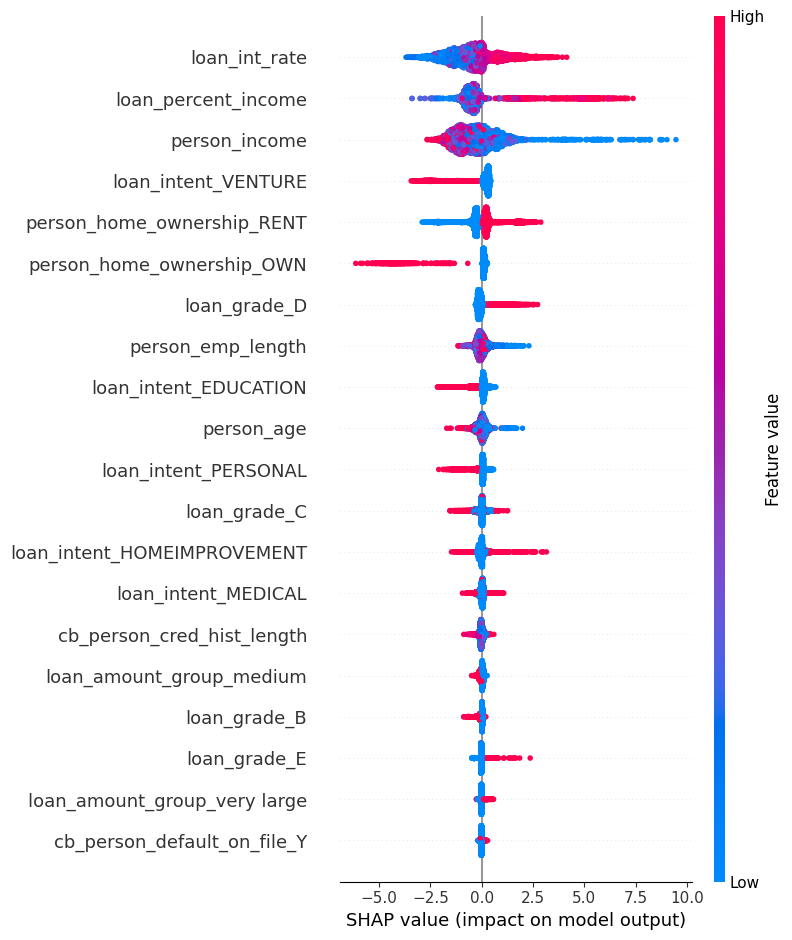

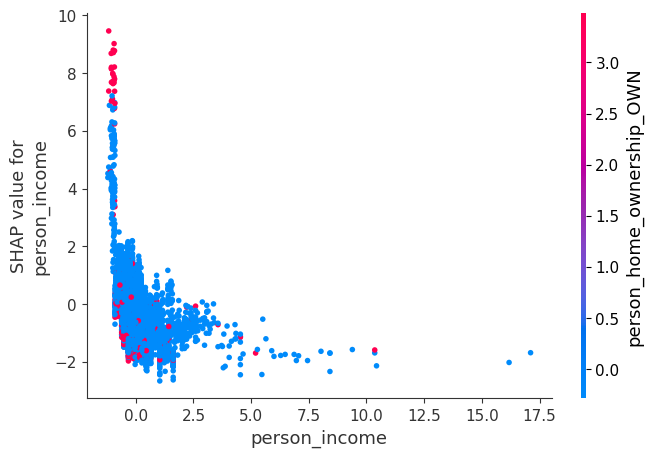

In [55]:
# XGBClassifier
import shap

# Initialize SHAP explainer for XGBoost Classifier
explainer_class = shap.TreeExplainer(xgb_class)

# Calculate SHAP values
shap_values_class = explainer_class.shap_values(X_test)

# Summary plot to visualize the importance of features
shap.summary_plot(shap_values_class, X_test, feature_names=X.columns)

# Dependence plot for a specific feature (e.g., 'person_income')
shap.dependence_plot("person_income", shap_values_class, X_test, feature_names=X.columns)

# Force plot for the first prediction
shap.force_plot(explainer_class.expected_value, shap_values_class[0,:], X_test[0,:], feature_names=X.columns)


The SHAP analysis for the XGBoost Classifier highlights that person_income, loan_int_rate, and loan_percent_income are the most influential features in predicting loan default. Lower income and higher interest rates increase the likelihood of default. The model's decisions can be interpreted through SHAP plots, offering transparency in understanding how various features impact the prediction of loan default.

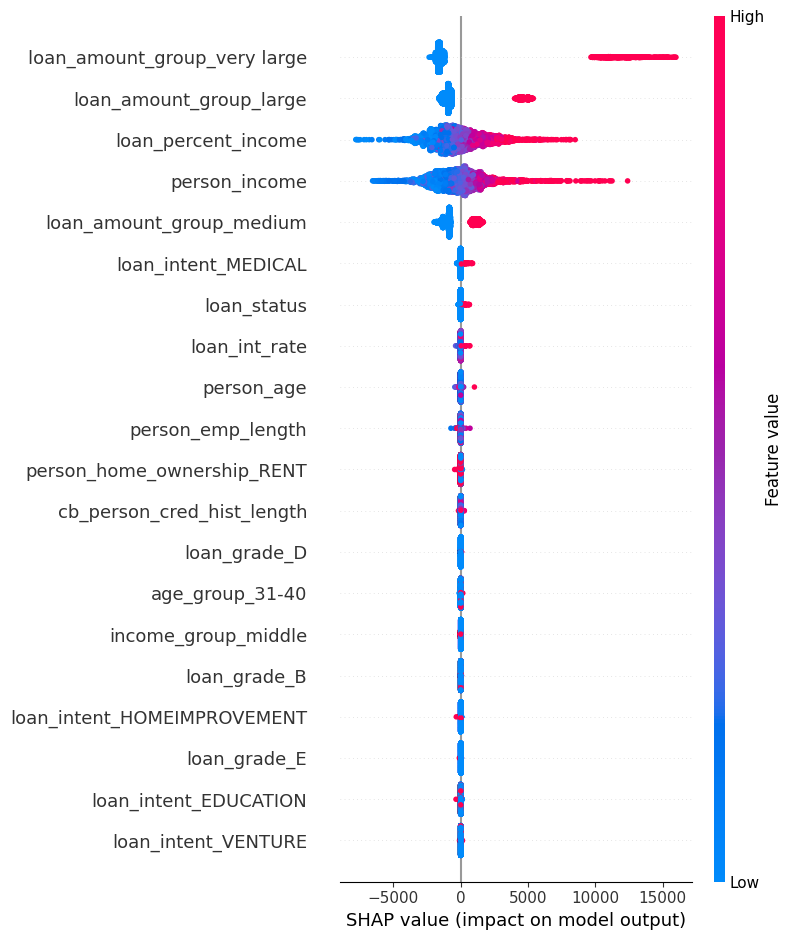

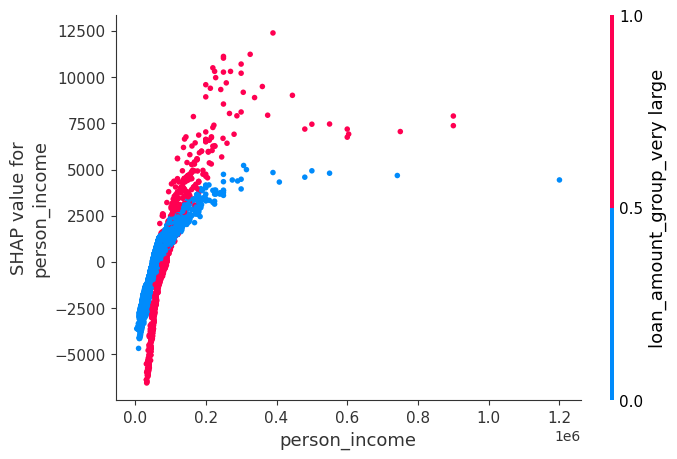

In [56]:
# XGBRegressor
# Initialize SHAP explainer for XGBoost Regressor
explainer_reg = shap.TreeExplainer(xgb_model)

# Calculate SHAP values
shap_values_reg = explainer_reg.shap_values(X_test_reg)

# Summary plot to visualize the importance of features
shap.summary_plot(shap_values_reg, X_test_reg, feature_names=X_reg.columns)

# Dependence plot for a specific feature (e.g., 'person_income')
shap.dependence_plot("person_income", shap_values_reg, X_test_reg, feature_names=X_reg.columns)

# Force plot for the first prediction
shap.force_plot(explainer_reg.expected_value, shap_values_reg[0,:], X_test_reg[0,:], feature_names=X_reg.columns)

Key features such as person_income, loan_grade, and loan_int_rate play a significant role in predicting loan amounts. Higher income and better loan grades lead to larger predicted loan amounts, while higher interest rates reduce them. SHAP analysis provides detailed explanations, helping stakeholders understand how the model arrives at its loan amount predictions for individual borrowers

# 7. Saving the models

In [72]:
import pickle

# Save XGBClassifier model
with open("C:/Users/Han/xgb_classifier.pkl", mode="wb") as file:
    pickle.dump(xgb_class, file)

# Save XGBRegressor model
with open("C:/Users/Han/xgb_regressor.pkl", mode="wb") as file:
    pickle.dump(xgb_reg, file)

---

# **Conclusion**

In today's rapidly evolving financial sector, the need for precise and reliable credit risk assessment and loan amount prediction models is paramount for informed and data-driven lending decisions. This project demonstrates how machine learning, particularly the use of XGBoost models, significantly enhances the accuracy and efficiency of these processes, helping financial institutions manage risk more effectively while providing better loan offerings tailored to borrowers' needs.

#### 1. *Borrower Profiles and Loan Intentions*
The analysis of borrower profiles and loan purposes revealed significant insights into the financial behaviors and needs of borrowers. A considerable portion of the loans were taken for educational purposes and home improvement, with a notable trend of borrowers renting property rather than owning homes. This suggests an opportunity for financial institutions to design loan products that cater specifically to these segments, offering more flexible terms or tailored repayment options that align with the financial capacity of renters and young professionals seeking educational advancement.

#### 2. *Default History and Risk Mitigation*
A crucial finding in the dataset is the significant proportion of borrowers with a default history, emphasizing the need for more robust risk assessment strategies. The high incidence of defaults highlights the importance of integrating more sophisticated machine learning models into the loan approval process to predict borrower risk more accurately. Additionally, this calls for implementing stronger financial literacy programs to educate borrowers on managing their credit and financial health. By proactively mitigating these risks through better borrower education and more nuanced credit risk models, lenders can potentially reduce default rates and foster healthier lending environments.

#### 3. *Demographic Insights and Borrowing Patterns*
Demographic analysis of the borrower data indicates that the majority of loan applications come from younger individuals, particularly those in the 21-30 age group, predominantly taking loans for educational purposes. Meanwhile, older borrowers tend to request loans for personal reasons such as home improvement or debt consolidation. These insights highlight the importance of demographic-specific financial products. Lenders could benefit from developing loan offerings that are customized based on age groups and life stages—providing lower interest rates or more favorable terms for education-related loans while offering flexible products for older borrowers with established credit histories.

#### 4. *Model Performance and Comparative Analysis*
The performance of the machine learning models used in this analysis further underscores the value of incorporating advanced algorithms in the financial industry. The models compared included XGBoost for both classification (credit risk) and regression (loan amount prediction) tasks, which consistently outperformed other algorithms such as Logistic Regression, Random Forest, Decision Tree, Linear Regression, and Artificial Neural Networks(ANN).

- **XGBoost Classifier**: This model demonstrated impressive performance in classifying credit risk, achieving an accuracy of 93%, with a precision rate of 96%, indicating its strong ability to differentiate between high and low-risk borrowers. This level of accuracy is crucial for financial institutions looking to make reliable credit decisions based on a borrower's likelihood of default.
  
- **XGBoost Regressor**: When applied to loan amount prediction, the XGBoost Regressor also excelled, achieving a remarkable RMSE of 201.22 and an R² score of 0.999. This near-perfect R² value signifies that the model explains almost all the variance in loan amounts, making it highly effective for predicting how much a borrower is likely to request or be approved for based on their financial and personal data.

Interestingly, attempts to further optimize these models through hyperparameter tuning yielded no significant improvement, with the untuned versions performing marginally better. This outcome suggests that the XGBoost models, even with their default settings, are highly optimized for this dataset and lending scenario. It also highlights the importance of balancing model complexity and interpretability in practical machine learning applications.

#### 5. **Feature Importance**
The feature importance analysis revealed key factors influencing both loan classification and prediction. Features such as the borrower’s credit history length, employment length, and home ownership status played a crucial role in determining loan outcomes. These insights provide financial institutions with actionable information to better understand what drives borrower behavior and risk, allowing them to refine their credit policies accordingly.



# **Recommendations for Financial Institutions**
Based on the findings from this project, several actionable recommendations can be made for financial institutions:
  
1. **Custom Loan Products**: Develop targeted loan offerings that cater to specific borrower segments, such as young professionals or individuals seeking education loans. Tailoring products based on borrower profiles can increase customer satisfaction and reduce default risks.
   
2. **Enhance Risk Assessment**: Incorporate machine learning models like XGBoost into the loan approval process. By leveraging their ability to predict credit risk with high accuracy, institutions can minimize financial losses while extending credit to deserving individuals.

3. **Financial Literacy Programs**: Implement educational initiatives to improve borrower financial literacy, reducing default rates and promoting healthier financial habits among borrowers.

4. **Continuous Model Monitoring**: Regularly evaluate and update machine learning models as new borrower data becomes available. This will ensure that the models remain accurate and relevant in predicting credit risk and loan amounts in a dynamic financial environment.

5. **Advanced Techniques**: Further exploration into ensemble learning methods could provide more comprehensive models for credit risk prediction, helping lenders stay ahead in the competitive financial market.


This project demonstrates the powerful role of machine learning in revolutionizing credit risk assessment and loan prediction models. By integrating these techniques into their operations, financial institutions can make more informed lending decisions, reduce default rates, and better meet the needs of diverse borrower profiles. Moving forward, continued investment in machine learning and AI technologies will be crucial for optimizing financial services and ensuring sustainable growth in the lending industry.

